# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
pal =  ['#FEEFE5', '#F8C8B0', '#E45011', '#87280E','#0F0608']

df = pd.read_csv('https://raw.githubusercontent.com/mchosasih99/dataset/main/Clicked%20Ads%20Dataset.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [3]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [4]:
df.describe(include='object')

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [5]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [6]:
# Menghapus kolom
df.drop('Unnamed: 0',1,inplace=True)

## Mengisi Null Value

In [7]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'],inplace=True)
df['Male'].fillna('Perempuan',inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(),inplace=True)

In [8]:
# Mengisi Null Value dengan median tiap city

income_median = df.groupby('city').agg({'Area Income':'median'}).reset_index() #Agregasi median income

df_null = df[df['Area Income'].isnull()] #Mengambil dataframe null

df_fillna = df_null.merge(income_median,
                          on='city',
                          how='left')
df_fillna.drop('Area Income_x',1,inplace=True)
df_fillna.rename(columns=({'Area Income_y': 'Area Income'}),inplace=True)
df_fillna = df_fillna[list(df.columns)] #Membuat dataframe baru

df = df.append(df_fillna) #Append ke dataframe
df.dropna(inplace=True) #Delete null value


In [9]:
#Merubah Value Target
df['Clicked on Ad'].replace({'Yes':1,'No':0},inplace=True)

In [10]:
#Merubah nama kolom
df.rename(columns={'Male':'jenis_kelamin'},inplace=True)

## Modifikasi kolom datetime

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time

df.drop('Timestamp',1, inplace=True)

In [12]:
df[['jam','menit','detik']] = df['Time'].astype(str).str.split(':', expand=True)
df['jam'] = df['jam'].astype(int)

In [13]:
#Group Labeling Waktu
conditions = [
    df['jam'].isin(list(range(0,4))),
    df['jam'].isin(list(range(4,11))),
    df['jam'].isin(list(range(11,15))),
    df['jam'].isin(list(range(15,19))),
    df['jam'].isin(list(range(19,25)))
]

choices = ['malam', 'pagi', 'siang', 'sore', 'malam']

df['waktu_iklan'] = np.select(conditions, choices)


In [14]:
#Menghapus kolom yang tidak perlu
df.drop(['jam','detik','menit','Time'], 1,inplace=True)

In [15]:
df = df.reset_index(drop=True)

# EDA

In [16]:
#Memisahkan categorical dan numeric value
cat = ['jenis_kelamin', 'Clicked on Ad', 'city',
       'province', 'category', 'waktu_iklan']
num = ['Daily Time Spent on Site', 'Age',
       'Area Income', 'Daily Internet Usage']

## Univariate Analysis

### Categorical

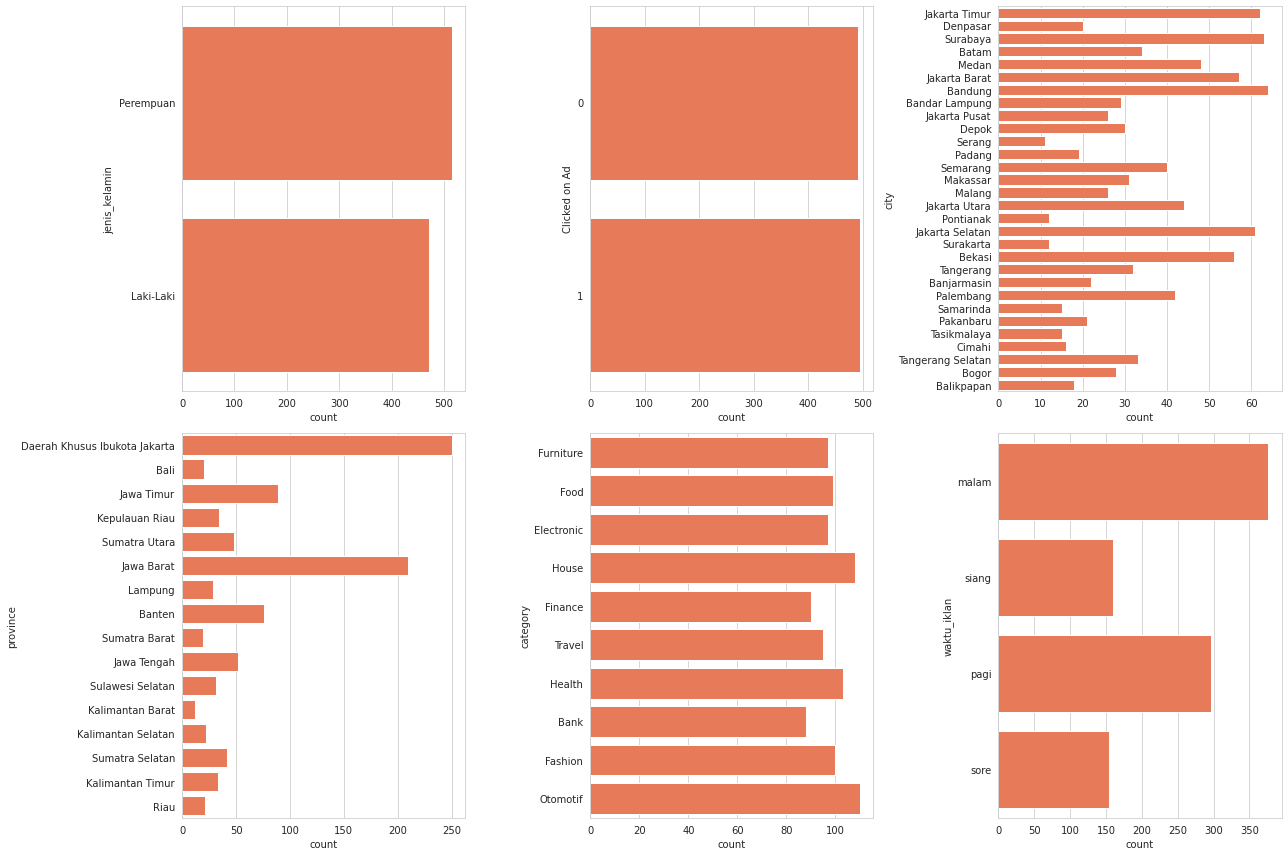

In [17]:
#Visualisasi data menggunakan countplot
sns.set_style(None)
plt.figure(figsize=(18,12))
for i in range(0, len(cat)):
    plt.subplot(2, 3, i+1)
    sns.countplot(y=df[cat[i]], palette=['#ff6d40'])
    plt.tight_layout()

- Jenis kelamin dan clicked on ad memiliki jumlah proporsi masing-masing yang cukup berimbang. 
- Iklan paling banyak ditayangkan di wilayah DKI Jakarta dan Jawa Barat pada pagi dan malam hari.
- Fitur kategori memiliki proporsi yang beragam.

### Numeric

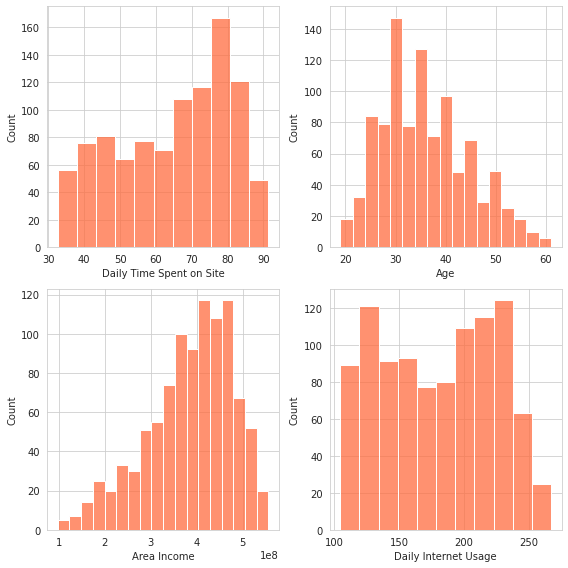

In [18]:
#Visualisasi menggunakan histplot
plt.figure(figsize=(8,8))
for i in range(0, len(num)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[num[i]], color='#ff6d40')
    plt.tight_layout()

- Konsumen paling banyak menghabiskan waktu mengunjungi website sekitar 70 - 80 menit.
- Area Income memiliki kecondongan negatif (banyak golongan menengah keatas), hal ini karena banyaknya target konsumen yang berasal dari DKI Jakarta.
- Yang menjadi target paling banyak adalah konsumen rentang umur 25-35 tahun.

## Bivariate

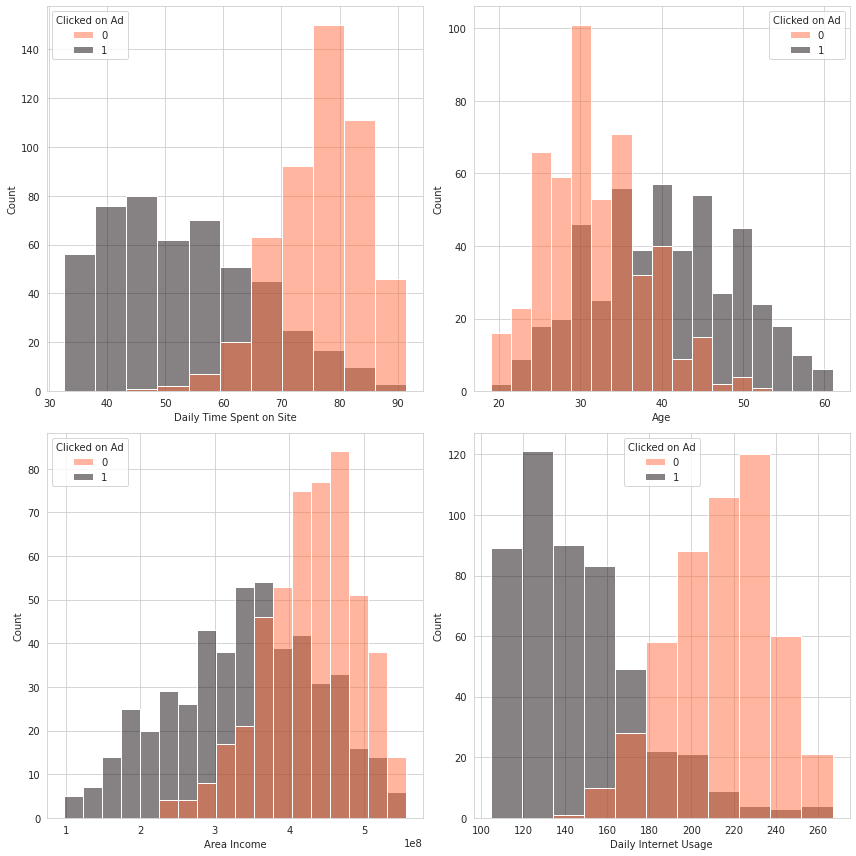

In [19]:
#Bivariate 1

plt.figure(figsize=(12,12))
for i in range(0, len(num)):
    plt.subplot(2, 2, i+1) 
    sns.histplot(data=df, x=num[i], hue='Clicked on Ad', palette=['#ff6d40','#0F0608'])
    # plt.xlabel(num[i])
    plt.tight_layout()

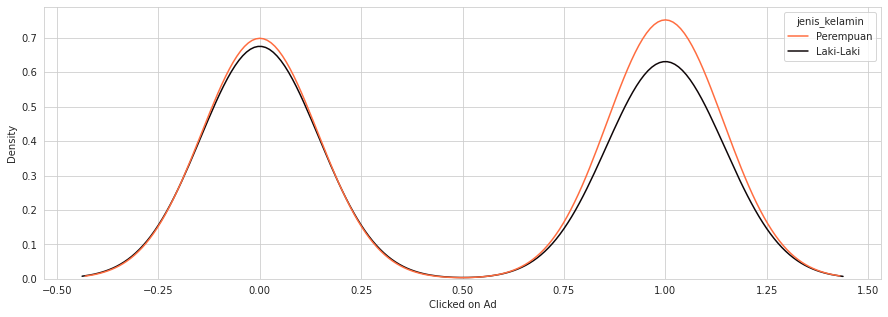

In [20]:
# Bivariate 2

plt.figure(figsize=(15,5))
sns.kdeplot(data=df, hue='jenis_kelamin',x='Clicked on Ad', palette=['#ff6d40', '#0F0608'])
plt.show()

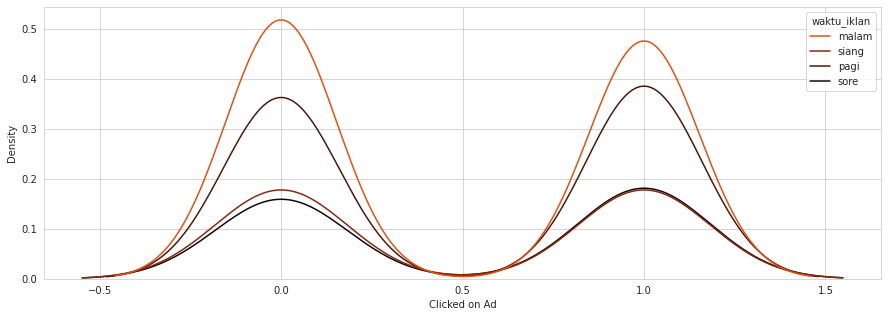

In [21]:
# Bivariate 3

plt.figure(figsize=(15,5))
sns.kdeplot(data=df, hue='waktu_iklan',x='Clicked on Ad', palette=['#E45011', '#87280E','#4B170B','#0F0608'])
plt.show()

Konsumen yang mengklik iklan memiliki kecenderungan sebagai berikut:
- Waktu yang dihabiskan di website rendah
- Umur diatas 35 tahun
- Area Income menengah kebawah
- Tidak terlalu lama menghabiskan waktu di internet
- Jenis kelamin perempuan
- Waktu malam

## Multivariate

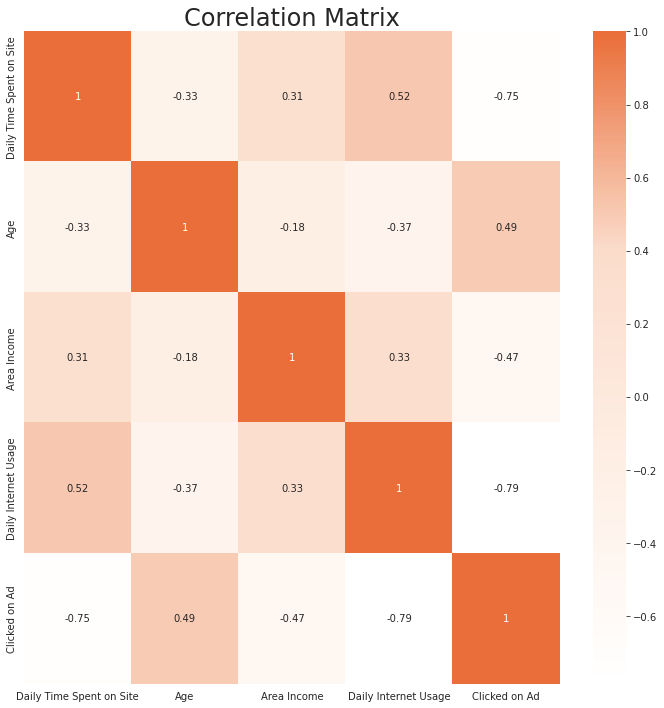

In [22]:
#Correlation Matrix
colors = ["#ffffff",'#FEEFE5', "#FBDCCB", "#E96E39"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),
            annot=True, cmap=cmap)
plt.title('Correlation Matrix', fontsize=24)
plt.show()

Daily Internet Usage dan Daily Time Spent on Site memiliki korelasi negatif cukup kuat terhadap Clicked on Ad, yang berarti semakin sedikit penggunaan internet harian maupun waktu dalam website, konsumen cenderung lebih mengklik iklan. Area Income (negatif) dan Age(Positif) memiliki juga memiliki korelasi yang dengan Clicked on Ad, tetapi korelasinya tidak terlalu tinggi.

In [23]:
# pip install ppscore

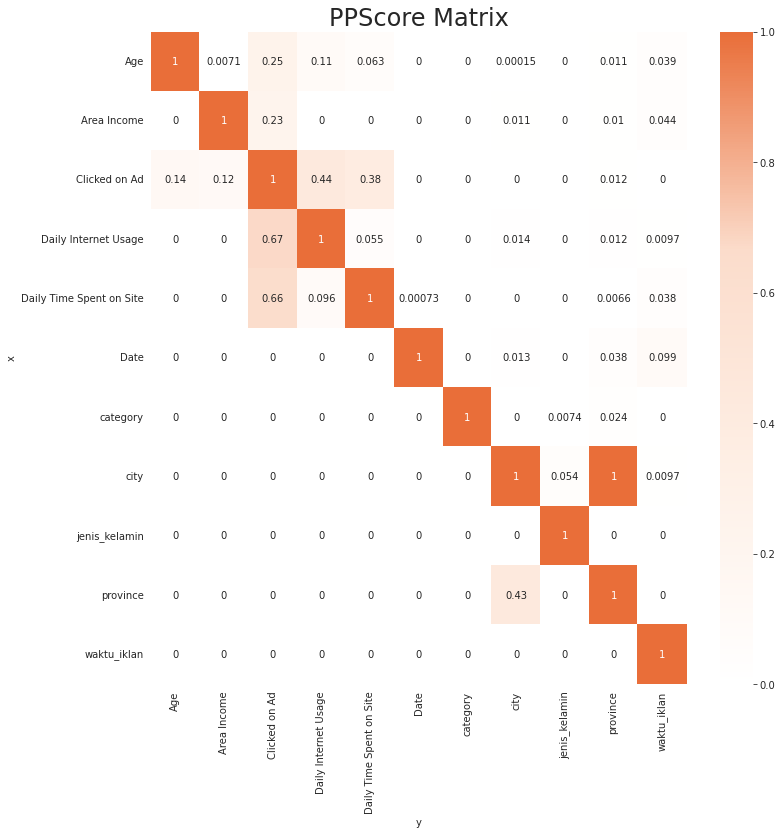

In [24]:
# PPScore

import ppscore as pps
matrix = pps.matrix(df)
matrix = matrix.pivot('x','y','ppscore')

#Plot PPScore
plt.figure(figsize=(12,12))
sns.heatmap(data=matrix,
            annot=True, cmap=cmap)
plt.title('PPScore Matrix', fontsize=24)
plt.show()

Berdasarkan Predictive Power Score (PPS), fitur yang bisa menjadi prediktor bagi Clicked on Ad adalah Daily Usage dan Daily Time Spent on Site. Age dan Area Income juga bisa menjadi prediktor bagi Clicked on Ad, tetapi nilai prediktornya tidak terlalu kuat.
